# Chapter 20: On writing, reports, process behavior charts, and how PowerPoint makes us stupid

For additional context see chapter 20 of [The Virus of Variation & Process Behavior Charts: A Guide for the Perplexed](https://www.brokenquality.com/book).

This notebook generates figures associated with the section of chapter 20 called *The Impact of Pathological Anatomy at Vienna General*.

In [25]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from process_improvement import xmr_charts as xmr
from process_improvement import comparison_charts as cc

%matplotlib inline

## Get data

In [5]:
# Sales dataset url
dataset_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/20-impact-of-pathological-anatomy-at-vienna-general-data.csv'

# Get data
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
df = get_data(dataset_url)

# Drop 'Note' column
df = df.drop(columns='Note')

# # Make 'Stage' and 'Year' columns dtype string
df[['Stage','Year']] = df[['Stage','Year']].astype('string')

df.head()

,Hospital,Stage,Year,Births,Deaths,Death-to-Birth Ratio
0,Vienna General,Before pathological anatomy,1784,284,6,2.1
1,Vienna General,Before pathological anatomy,1785,899,13,1.4
2,Vienna General,Before pathological anatomy,1786,1151,5,0.4
3,Vienna General,Before pathological anatomy,1787,1407,5,0.4
4,Vienna General,Before pathological anatomy,1788,1425,5,0.4


### Split dataframe according 'Stage'

In [11]:
# Get data 'Stage' 
grouped_df = df.groupby('Stage')

# Create dataframes according to stage
before_pa = grouped_df.get_group('Before pathological anatomy')
after_pa = grouped_df.get_group('After pathological anatomy').reset_index(drop=True)

### Calculate the moving ranges for each dataframe

In [14]:
# Before pathological anatomy moving range
before_pa = before_pa.copy()
before_pa['Moving Ranges'] = abs(before_pa['Death-to-Birth Ratio'].diff())
# After pathological anatomy moving range
after_pa = after_pa.copy()
after_pa['Moving Ranges'] = abs(after_pa['Death-to-Birth Ratio'].diff())

## Fig 20.7: XmR Chart of before pathological anatomy at Vienna General

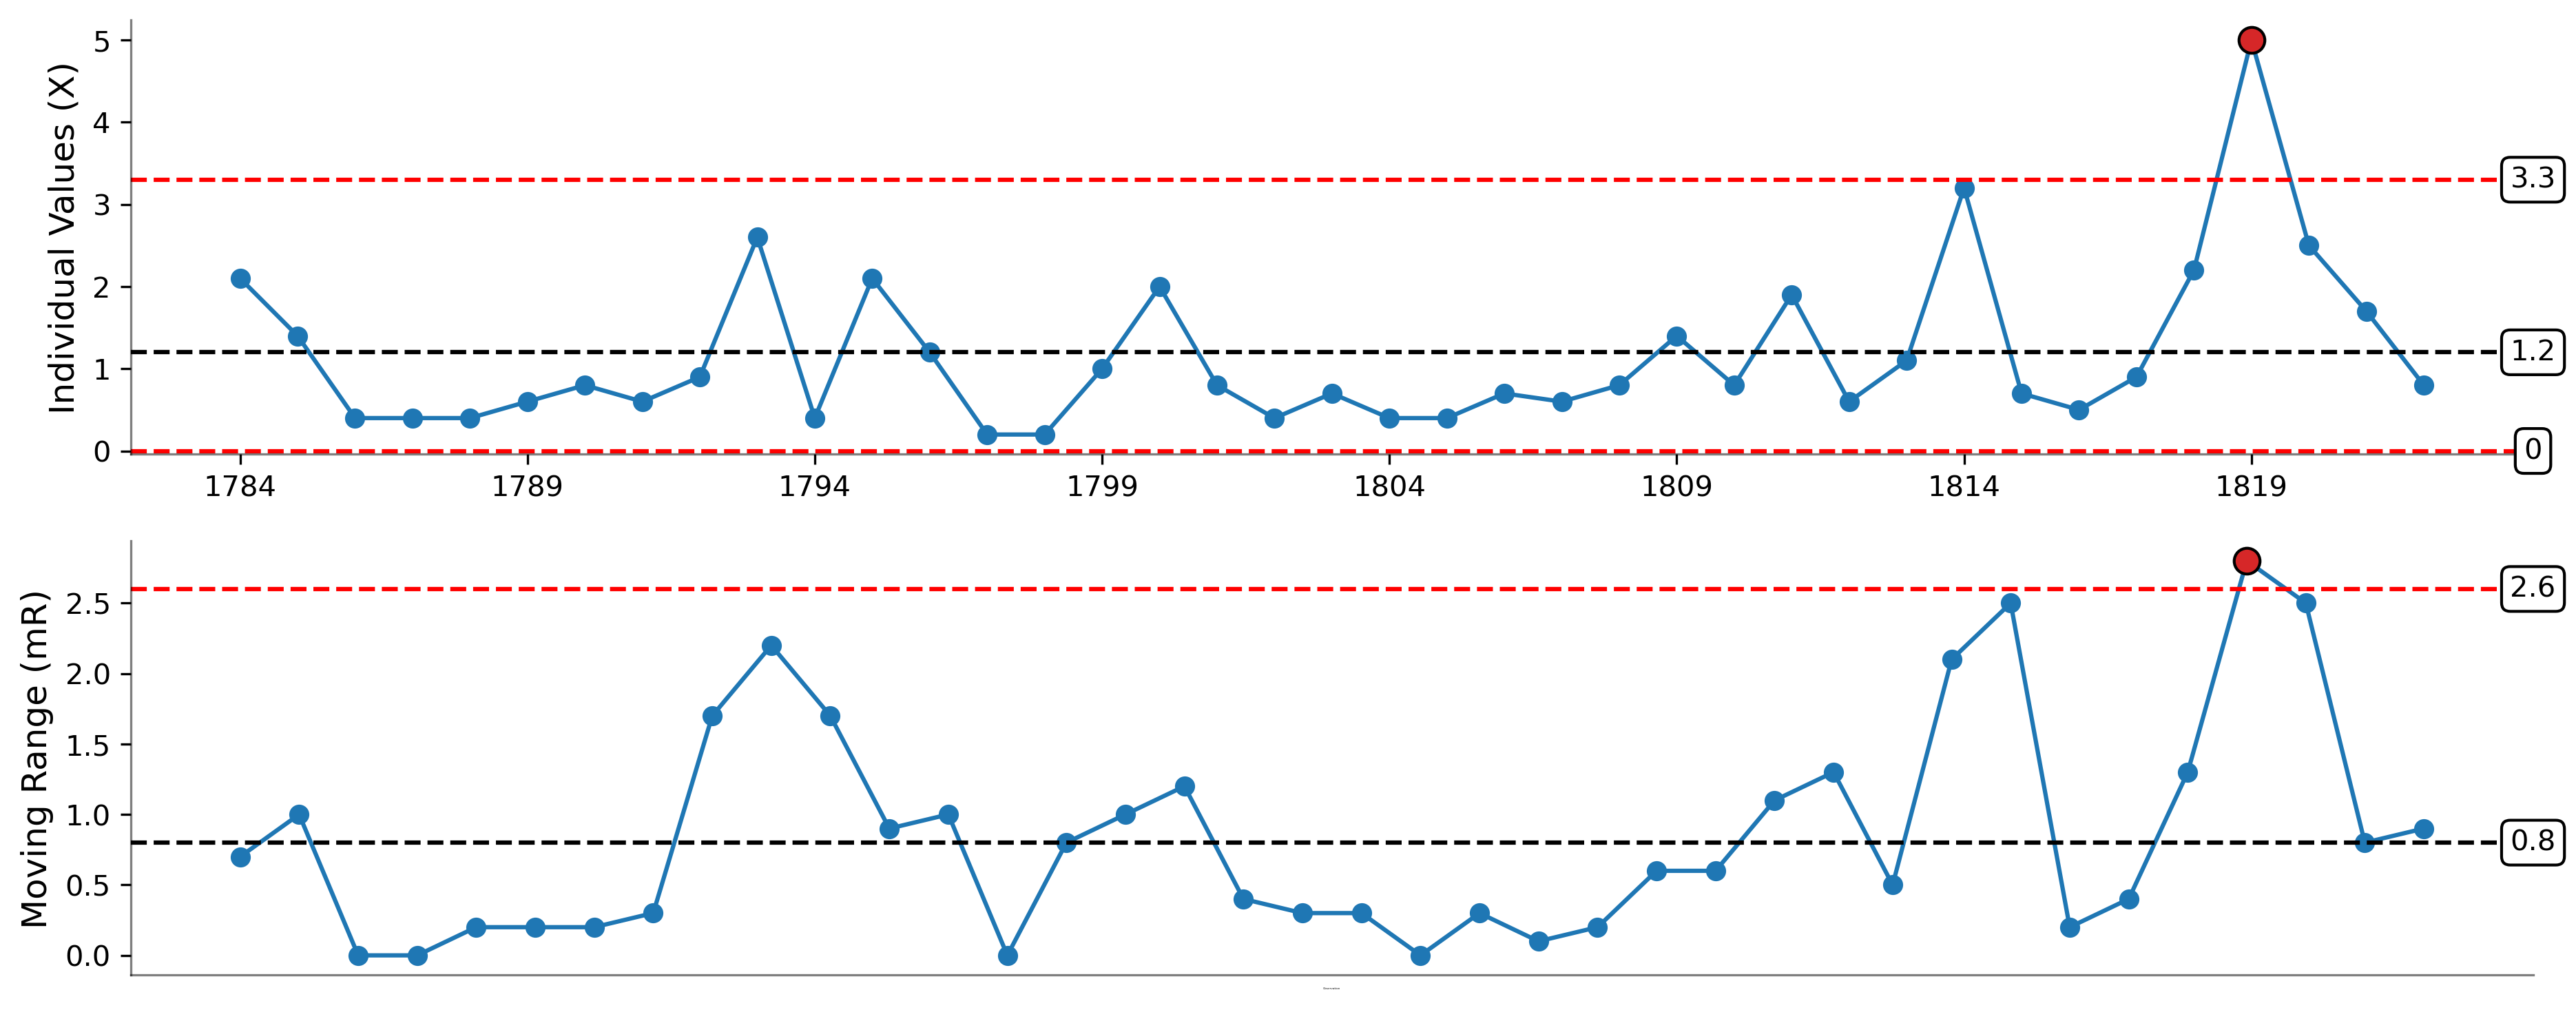

In [23]:
before_xmr_results = xmr.xmrchart(before_pa,
                                  'Death-to-Birth Ratio', 
                                  'Year',
                                  tickinterval=5,
                                  round_value=1)

## Fig 20.8: XmR Chart of after pathological anatomy at Vienna General

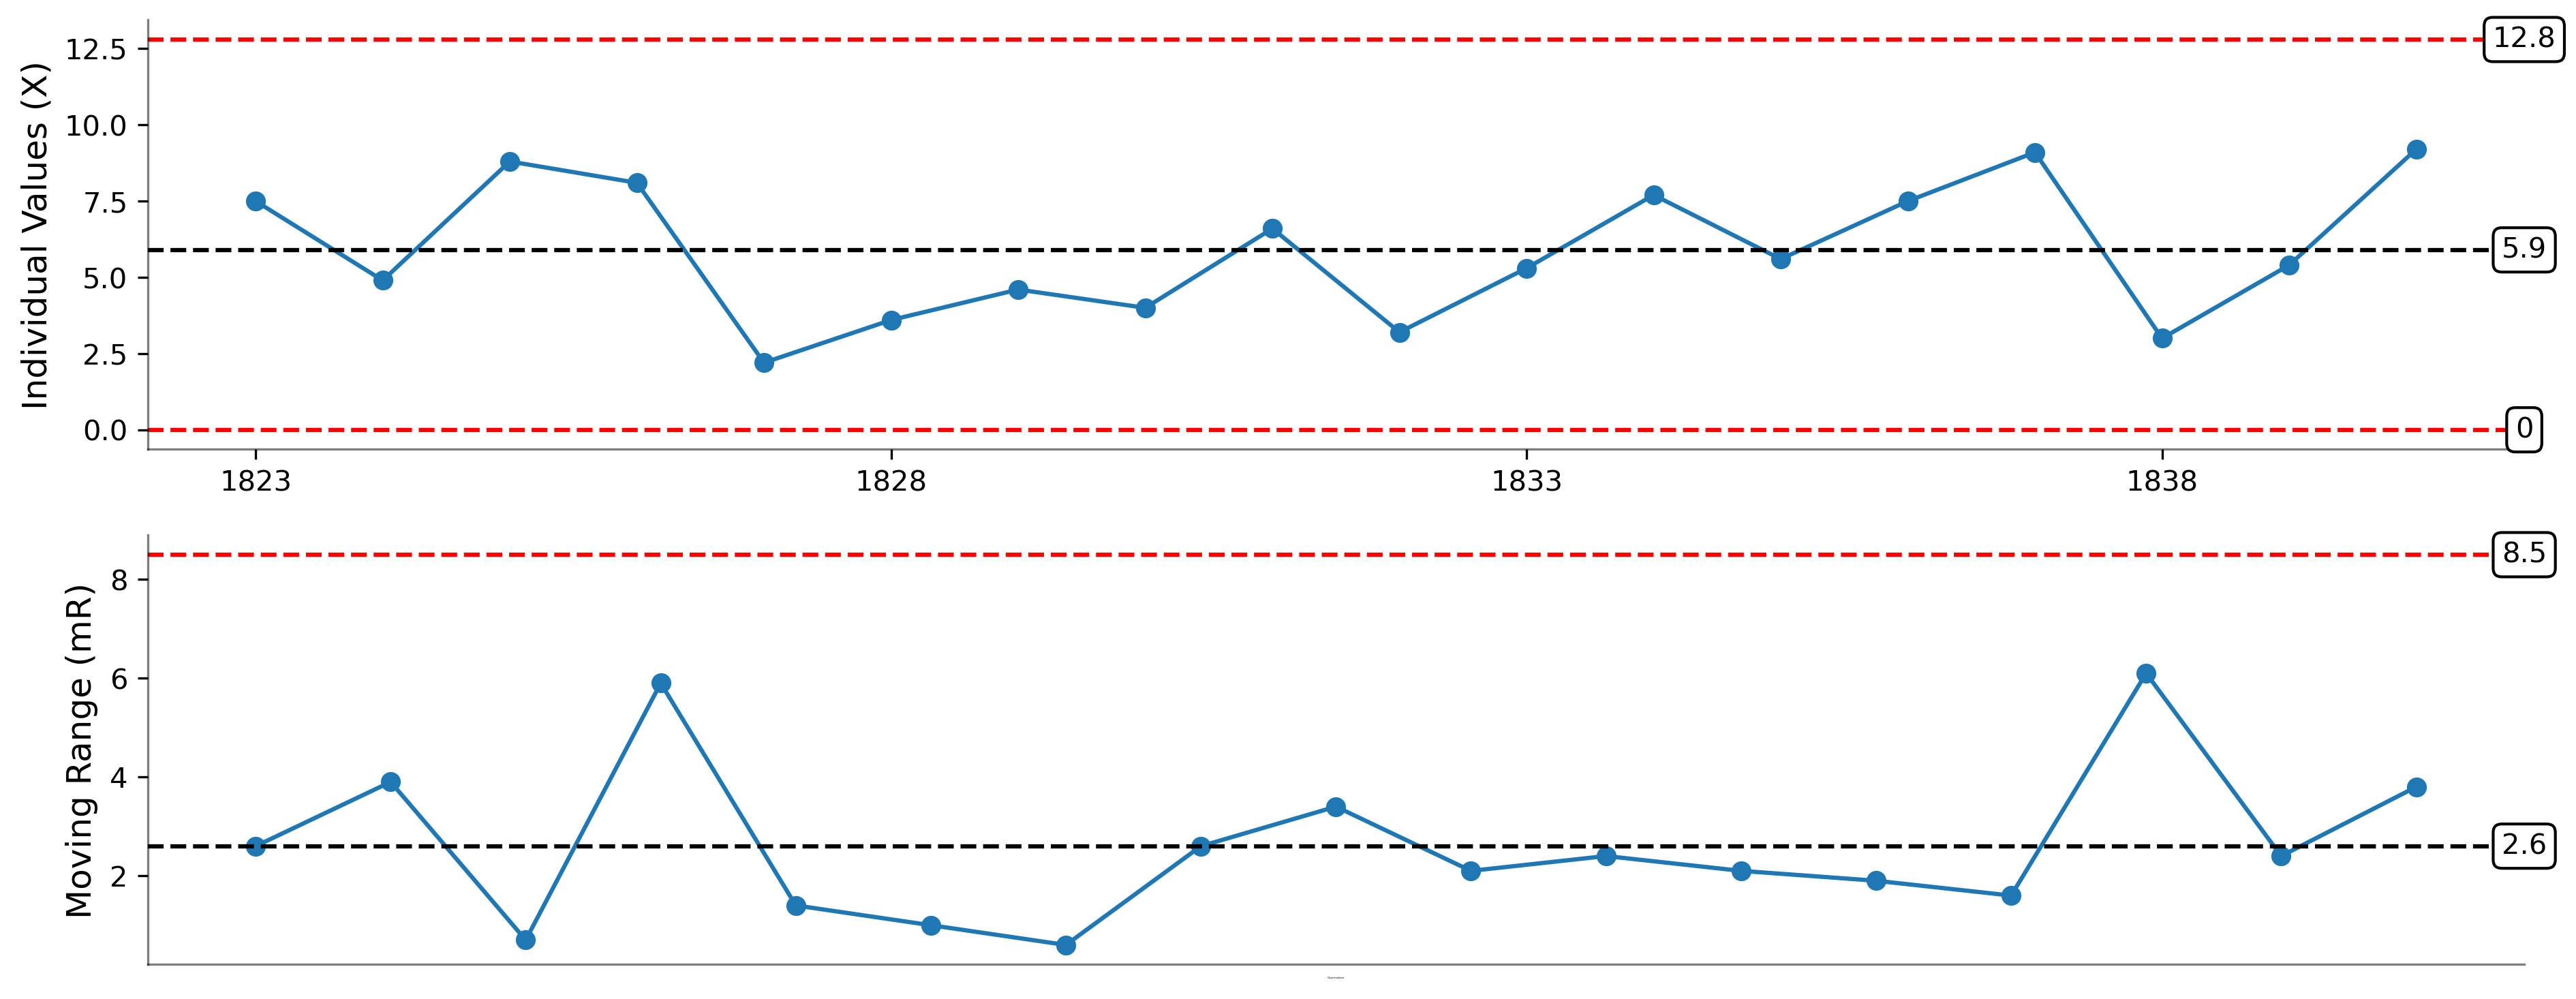

In [24]:
after_xmr_results = xmr.xmrchart(after_pa,
                                'Death-to-Birth Ratio',
                                'Year',
                                tickinterval=5, 
                                round_value=1)

## Fig 20.9: XmR Chart comparing before vs after

In [27]:
# Create list of dataframes
df_list = [before_pa, after_pa]
subplot_titles_list = ['Before pathological anatomy', 
                       'After pathological anatomy']

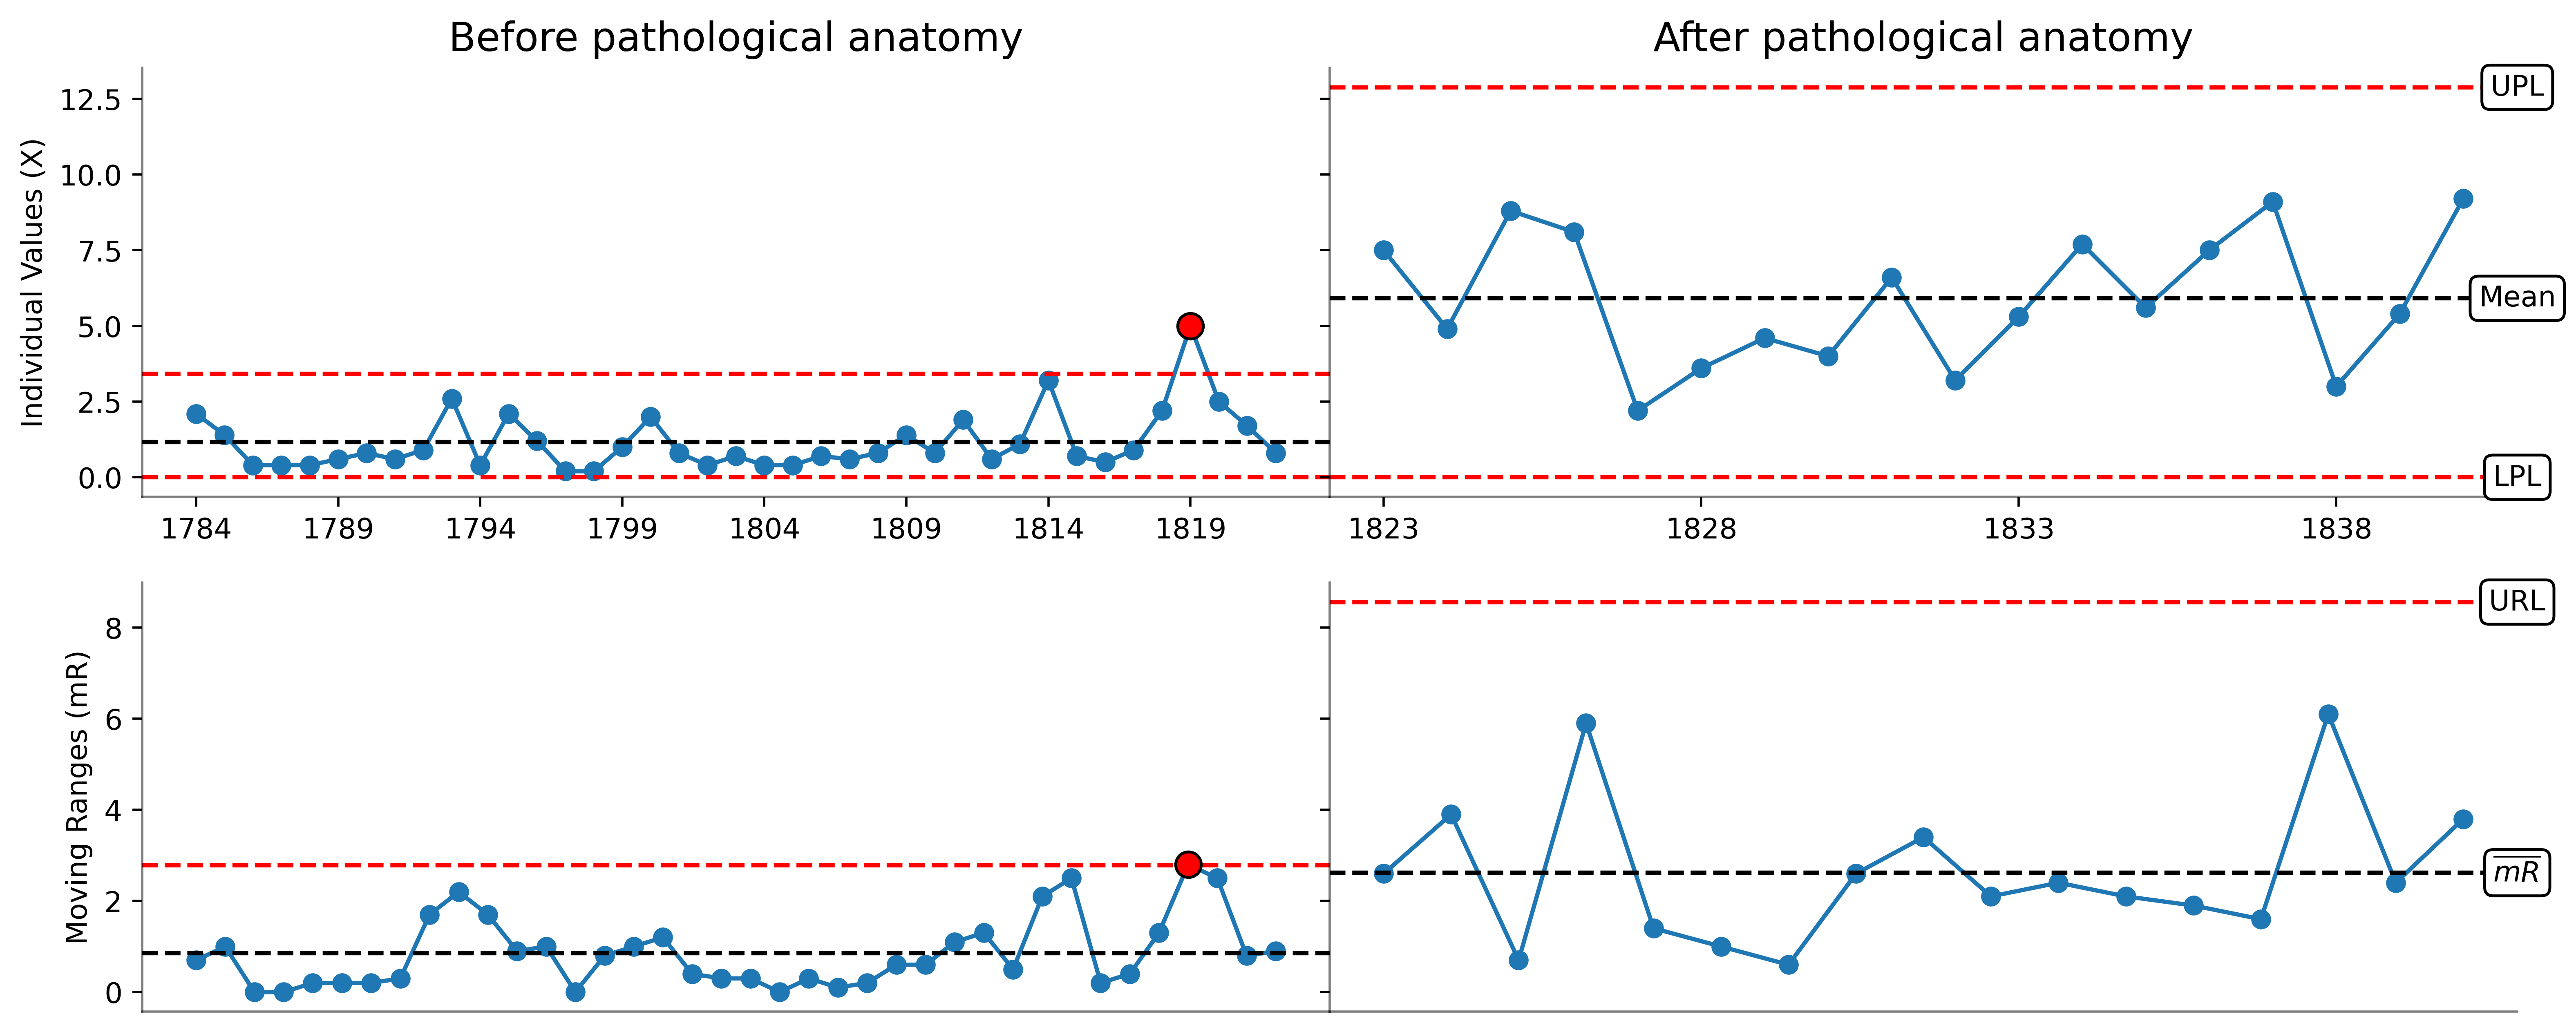

In [31]:
before_after_results = cc.xmr_comparison(df_list, 
                                           'Death-to-Birth Ratio', 
                                           'Year', 
                                           subplot_titles_list)

## Fig 20.10: Bar chart comparing means and UPL

This bar chart is constructed using the dataframe that is returned by the `cc.xmr_comparison` that generates figure 20.9.

In [32]:
# Show the results dataframe
before_after_results

,Label,Mean,Ave. mR,UPL,LPL,URL,PLR,Characterization
0,Before pathological anatomy,1.16,0.85,3.4210,0,2.78,3.4210,Unpredictable
1,After pathological anatomy,5.91,2.62,12.8792,0,8.56,12.8792,Predictable


In [37]:
# Select 'Label', 'Mean', and 'UPL' column
before_after_mean_UPL = before_after_results[['Label','Mean','UPL']]
before_after_mean_UPL

,Label,Mean,UPL
0,Before pathological anatomy,1.16,3.4210
1,After pathological anatomy,5.91,12.8792


In [44]:
# Transpose dataframe
before_after_mean_UPL_T = before_after_mean_UPL.T
# Make first row column labels
before_after_mean_UPL_T.columns = before_after_mean_UPL_T.iloc[0]
before_after_mean_UPL_T = before_after_mean_UPL_T [1:]
# Stack xchart_comparison_T
before_after_mean_UPL_T = (before_after_mean_UPL_T 
                           .stack()
                           .to_frame()
                           .reset_index()
                           .rename(columns={'level_0':'Statistic',0:'Value'})
                          )
# Show results
before_after_mean_UPL_T

,Statistic,Label,Value
0,Mean,Before pathological anatomy,1.16
1,Mean,After pathological anatomy,5.91
2,UPL,Before pathological anatomy,3.421
3,UPL,After pathological anatomy,12.8792


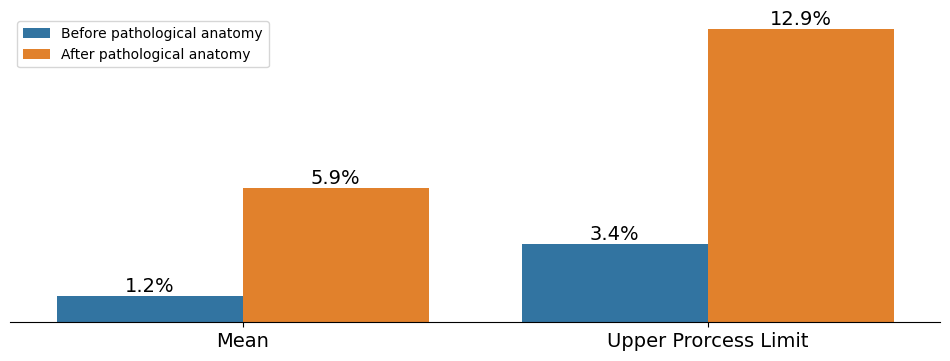

In [49]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,4))
# Plot data in bar chart
sns.barplot(data=before_after_mean_UPL_T, 
            x='Statistic', 
            y='Value', 
            hue='Label')

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=14)  # Formats values to one decimal place

# Remove legend title
legend = plt.legend(title="")
# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')
# Remove yaxis ticks
ax.yaxis.set_ticks([])
# Create new labels for xaxis
new_labels = ['Mean', 'Upper Prorcess Limit']
# Apply new labels to xaxis
ax.xaxis.set_ticklabels(new_labels, fontsize=14)
# Despine figure
sns.despine(left=True)

# Show plot
plt.show()